# Plot notebook test

### Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import os

### Function: fixed cores

In [2]:
def generate_plots_fixed_cores(csv_name1, csv_name2, csv_name3, dataset_folder = 'dataset'):

    # Transalate a_b_c_mkl in a_b_c
    def remove_library_names(input_string):
        # Remove "mkl," "oblas," and "blis" (case-insensitive) from the input string
        modified_string = input_string.replace('mkl.x', '').replace('oblas.x', '').replace('blis.x', '').replace('detailed.csv', '').replace('opt.x', 'optimized').replace('mkl','')

        return modified_string
    
    def remove_underscores(input_string):
        # Replace underscores with spaces
        modified_string = input_string.replace('_', ' ')

        return modified_string

    # Translate underscores to spaces in the CSV file name for plot titles
    plot_title = remove_underscores(remove_library_names(csv_name1))

    # Get the current directory
    current_dir = os.getcwd()

    # Define the path to the CSV file
    csv_file_path1 = os.path.join(current_dir, dataset_folder, csv_name1)
    csv_file_path2 = os.path.join(current_dir, dataset_folder, csv_name2)
    csv_file_path3 = os.path.join(current_dir, dataset_folder, csv_name3)

    # Check if the CSV file exists
    df = list()
    for csv_file_path in csv_file_path1, csv_file_path2, csv_file_path3:
        if not os.path.exists(csv_file_path):
            print(f"CSV file '{csv_file_path}' not found.")
        else:
            # Read data from the CSV file
            df.append(pd.read_csv(csv_file_path))

    # Compute the sample mean and standard deviation for time and GFLOPS
    time_mean = list()
    time_std = list()
    gflops_mean = list()
    gflops_std = list()
    for dataframe in df:
        time_mean.append(dataframe.groupby('Matrix Size')['Elapsed Time (s)'].mean())
        time_std.append(dataframe.groupby('Matrix Size')['Elapsed Time (s)'].std())

        gflops_mean.append(dataframe.groupby('Matrix Size')['GFLOPS'].mean())
        gflops_std.append(dataframe.groupby('Matrix Size')['GFLOPS'].std())

    # Create the first plot (matrix size vs. sample mean of time with shaded standard deviation)
    library_names = ['Mkl','Oblas','Blis']
    plt.figure(figsize=(8, 4))
    for (tm, ts, ln) in zip(time_mean, time_std,library_names):
        plt.plot(tm.index, tm, marker='o', linestyle='-', label=ln+' - Time mean')
        plt.fill_between(tm.index, tm - ts, tm + ts, alpha=0.2, label=ln+' - Time sd')
    plt.xlabel('Matrix Size')
    plt.ylabel('Elapsed Time (s)')
    plt.title('SIZE vs TIME - ' + plot_title)
    plt.grid(True)
    plt.legend()


    # Define the folder where you want to save the image
    folder_to_store_path = './'+dataset_folder+'/plots'
    # Save the first plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'time.png')
    plt.savefig(filename)

    # Create the second plot (matrix size vs. sample mean of GFLOPS with shaded standard deviation)
    plt.figure(figsize=(8, 4))
    for (gm, gs, ln) in zip(gflops_mean, gflops_std, library_names):
        plt.plot(gm.index, gm, marker='o', linestyle='-', label=ln+' - Gflops mean')
        plt.fill_between(gm.index, gm - gs, gm + gs, alpha=0.2, label=ln+' - Gflops sd')
    plt.xlabel('Matrix Size')
    plt.ylabel('GFLOPS')
    plt.title('SIZE vs GFLOPS - ' + plot_title)
    plt.grid(True)
    plt.legend()

    
    # Save the first plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'gflops.png')
    plt.savefig(filename)

    # Show the plots (optional)
    plt.show()


### Application

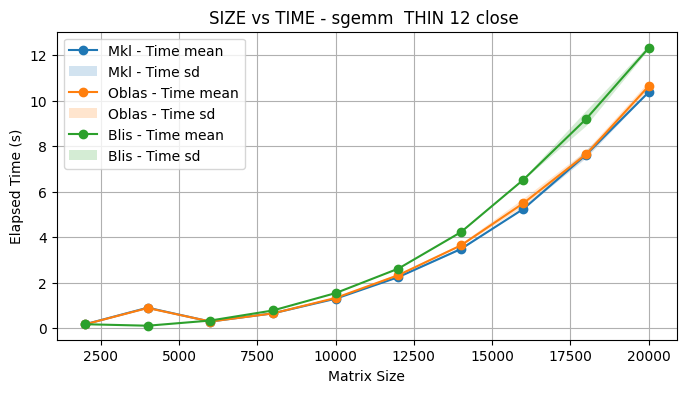

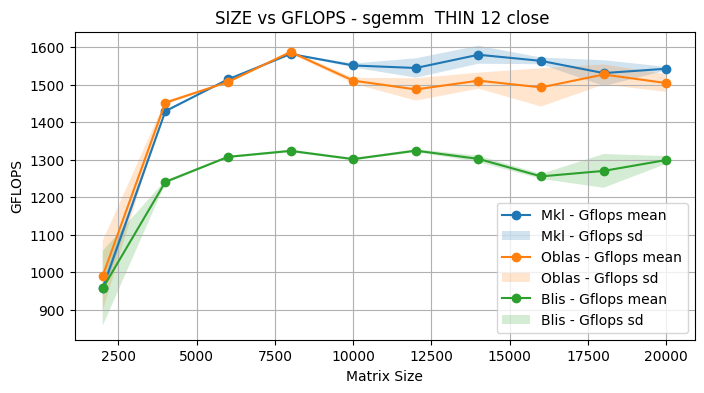

In [40]:
# Example usage:
# Call the function with your CSV file names
generate_plots_fixed_cores( 
    csv_name1=  "sgemm_mkl.x_THIN_12_close_detailed.csv", 
    csv_name2="sgemm_oblas.x_THIN_12_close_detailed.csv",
    csv_name3= "sgemm_blis.x_THIN_12_close_detailed.csv",
    dataset_folder="csv_results_THIN"
    )

### Function: fixed size

In [3]:
def generate_plots_fixed_size(csv_name1, csv_name2, csv_name3, dataset_folder = 'dataset'):

    # Transalate a_b_c_mkl in a_b_c
    def remove_library_names(input_string):
        # Remove "mkl," "oblas," and "blis" (case-insensitive) from the input string
        modified_string = input_string.replace('mkl.x', '').replace('oblas.x', '').replace('blis.x', '').replace('detailed.csv', '').replace('opt.x', 'optimized').replace('mkl','')

        return modified_string
    
    def remove_underscores(input_string):
        # Replace underscores with spaces
        modified_string = input_string.replace('_', ' ')

        return modified_string

    # Translate underscores to spaces in the CSV file name for plot titles
    plot_title = remove_underscores(remove_library_names(csv_name1))

    # Get the current directory
    current_dir = os.getcwd()

    # Define the path to the CSV file
    csv_file_path1 = os.path.join(current_dir, dataset_folder, csv_name1)
    csv_file_path2 = os.path.join(current_dir, dataset_folder, csv_name2)
    csv_file_path3 = os.path.join(current_dir, dataset_folder, csv_name3)

    # Check if the CSV file exists
    df = list()
    for csv_file_path in csv_file_path1, csv_file_path2, csv_file_path3:
        if not os.path.exists(csv_file_path):
            print(f"CSV file '{csv_file_path}' not found.")
        else:
            # Read data from the CSV file
            df.append(pd.read_csv(csv_file_path))

    # Compute the sample mean and standard deviation for time and GFLOPS
    time_mean = list()
    time_std = list()
    gflops_mean = list()
    gflops_std = list()
    for dataframe in df:
        time_mean.append(dataframe.groupby('Number of cores')['Elapsed Time (s)'].mean())
        time_std.append(dataframe.groupby('Number of cores')['Elapsed Time (s)'].std())

        gflops_mean.append(dataframe.groupby('Number of cores')['GFLOPS'].mean())
        gflops_std.append(dataframe.groupby('Number of cores')['GFLOPS'].std())

    # Create the first plot (matrix size vs. sample mean of time with shaded standard deviation)
    library_names = ['Mkl','Oblas','Blis']
    plt.figure(figsize=(8, 4))
    for (tm, ts, ln) in zip(time_mean, time_std,library_names):
        plt.plot(tm.index, tm, marker='o', linestyle='-', label=ln+' - Time mean')
        plt.fill_between(tm.index, tm - ts, tm + ts, alpha=0.2, label=ln+' - Time sd')
    plt.xlabel('Number of cores')
    plt.ylabel('Elapsed Time (s)')
    plt.title('# OF CORES vs TIME - ' + plot_title)
    plt.grid(True)
    plt.legend()


    # Define the folder where you want to save the image
    folder_to_store_path = './'+dataset_folder+'/plots'
    # Save the first plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'time.png')
    plt.savefig(filename)

    # Create the second plot (matrix size vs. sample mean of GFLOPS with shaded standard deviation)
    plt.figure(figsize=(8, 4))
    for (gm, gs, ln) in zip(gflops_mean, gflops_std, library_names):
        plt.plot(gm.index, gm, marker='o', linestyle='-', label=ln+' - Gflops mean')
        plt.fill_between(gm.index, gm - gs, gm + gs, alpha=0.2, label=ln+' - Gflops sd')
    plt.xlabel('Number of cores')
    plt.ylabel('GFLOPS')
    plt.title('# OF CORES vs GFLOPS - ' + plot_title)
    plt.grid(True)
    plt.legend()

    
    # Save the first plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'gflops.png')
    plt.savefig(filename)

    # Show the plots (optional)
    plt.show()


### Application

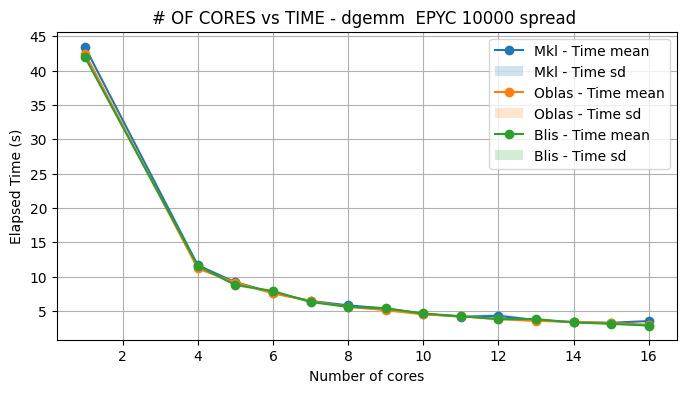

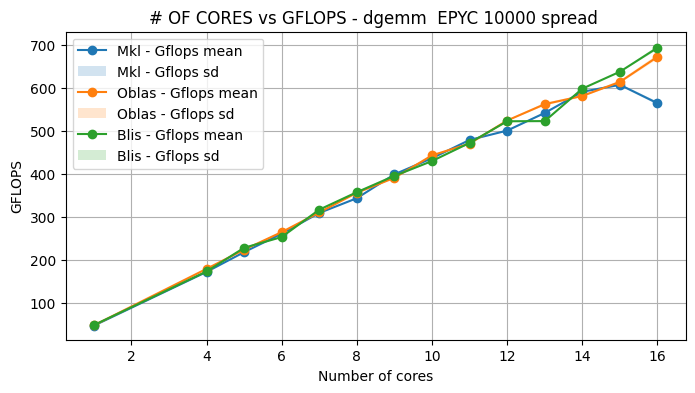

In [8]:
# Example usage:
# Call the function with your CSV file names
generate_plots_fixed_size( 
    csv_name1=  "dgemm_mkl.x_EPYC_10000_spread_detailed.csv", 
    csv_name2="dgemm_oblas.x_EPYC_10000_spread_detailed.csv",
    csv_name3= "dgemm_blis.x_EPYC_10000_spread_detailed.csv",
    dataset_folder="csv_results_scalability_deepening_EPYC"
    )

### The single function

In [27]:
# auxiliary
def translate_underscore_to_space(input_string):
    # Split the input string at underscores
    parts = input_string.split('_')
    
    # Join the parts with spaces to form the translated string
    translated_string = ' '.join(parts)
    
    return translated_string

# Csv_name
csv_name = 'myCsv.csv'

# Get the current directory
plot_title = translate_underscore_to_space(csv_name)
current_dir = os.getcwd()

# Define the path to the CSV file
csv_file_path = os.path.join(current_dir, 'dataset', csv_name )

# Check if the CSV file exists
if not os.path.exists(csv_file_path):
    print(f"CSV file '{csv_file_path}' not found.")
else:
    # Read data from the CSV file
    df = pd.read_csv(csv_file_path)

    # Compute the sample mean and standard deviation for time and GFLOPS
    time_mean = df.groupby('Matrix Size')['Elapsed Time (s)'].mean()
    time_std = df.groupby('Matrix Size')['Elapsed Time (s)'].std()

    gflops_mean = df.groupby('Matrix Size')['GFLOPS'].mean()
    gflops_std = df.groupby('Matrix Size')['GFLOPS'].std()

    # Create the first plot (matrix size vs. sample mean of time with shaded standard deviation)
    plt.figure(figsize=(8, 4))
    plt.plot(time_mean.index, time_mean, marker='o', linestyle='-', label='Mean')
    plt.fill_between(time_mean.index, time_mean - time_std, time_mean + time_std, alpha=0.2, label='Standard Deviation')
    plt.xlabel('Matrix Size')
    plt.ylabel('Elapsed Time (s)')
    plt.title('TIME - '+ plot_title)
    plt.grid(True)
    plt.legend()

    # Save the first plot as 'plot_11.png'
    plt.savefig(csv_name+'_time.png')

    # Create the second plot (matrix size vs. sample mean of GFLOPS with shaded standard deviation)
    plt.figure(figsize=(8, 4))
    plt.plot(gflops_mean.index, gflops_mean, marker='o', linestyle='-', label='Mean')
    plt.fill_between(gflops_mean.index, gflops_mean - gflops_std, gflops_mean + gflops_std, alpha=0.2, label='Standard Deviation')
    plt.xlabel('Matrix Size')
    plt.ylabel('GFLOPS')
    plt.title('GFLOAPS - '+ plot_title)
    plt.grid(True)
    plt.legend()

    # Save the second plot as 'plot_12.png'
    plt.savefig(csv_name+'_gfloaps.png')

    # Show the plots (optional)
    plt.show()


CSV file '/home/samuele/Scrivania/HPC/Plot/dataset/myCsv.csv' not found.
